# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division
import math
import nsfg
import thinkplot

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [3]:
# solution
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [4]:
# Solution
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [5]:
# Solution goes here
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2046226218
preg.totalwgt_kg.mean()

3.2956336317057553

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [6]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [8]:
# Solution goes here
print(resp.age_r.value_counts().sort_index())
print("The youngest repsondent is ", resp.age_r.min(), " the oldest ", resp.age_r.max())


15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64
The youngest repsondent is  15  the oldest  44


How old is the respondent with `caseid` 1?

In [9]:
# Solution goes here
resp.age_r[resp.caseid == 1]

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [10]:
# Solution goes here
preg.prglngth[preg.caseid == 2298]

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [11]:
# Solution goes here 
# Although unnecessary in this case since there is just one instance this works with multiple instances as well
id5012 = preg[preg.caseid == 5012] # Create dataframe of all instances of caseid
id5012.totalwgt_lb[id5012.birthord == 1] 

5515    6.0
Name: totalwgt_lb, dtype: float64

# Excercise 1-2 
## copied from spyder console

In [12]:
import nsfg
import thinkstats2


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    
    return df


def ValidatePregnumCount(resp):
   preg = nsfg.ReadFemPreg()  
   preg_map = nsfg.MakePregMap(preg) 
   
   for index, pregnum in resp.pregnum.items():
       caseid = resp.caseid[index]
       indicies = preg_map[caseid] 
       
       if len(indicies) != pregnum:
           print(caseid, len(indicies), pregnum)
           return False
       else:
           return True


def main():
    resp = ReadFemResp()
    print(resp.pregnum.value_counts().sort_index())
    
    validated = ValidatePregnumCount(resp)
    if validated:
        print('Test has passed')
    else:
        print("Numbers don't match")
        
        
if __name__ == '__main__':
    main()
    

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64
Test has passed


# Exercise 2-1

### Maximum effect for news.


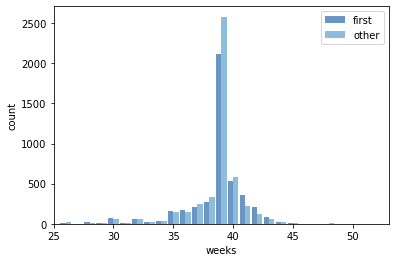

<Figure size 576x432 with 0 Axes>

In [21]:
first = preg[preg.birthord == 1]
other = preg[preg.birthord > 1] # Select birth order greater than 1 to remove pregnancies with no birth.
first_hist = thinkstats2.Hist(first.prglngth, label= 'first')
other_hist = thinkstats2.Hist(other.prglngth, label= 'other')
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align= 'right', width= width)
thinkplot.Hist(other_hist, align= 'left', width= width)

thinkplot.Show(xlabel= 'weeks', ylabel= 'count', xlim= 25)



As evidenced above with the dark blue representing first births past the 40 week mark first births are more frequent than later births. As shown below are the numbers of cases over the most common week 39 delivery and how it is represented as a precentage of deliveries. First births are late .05 or 5% more.

In [14]:
first.prglngth.mode()
other.prglngth.mode()
late1 = len(first[first.prglngth > 39])
late_all = len(other[other.prglngth > 39])
print('Total first births after 39 weeks', late1)
print('Total other births after 39 weeks', late_all)
all1 = len(first)
all_all = len(other)
print('Late first births acount for', (late1 / all1),' For all othe it is ',(late_all / all_all))

Total first births after 39 weeks 1222
Total other births after 39 weeks 1024
Late first births acount for 0.27690913210967594  For all othe it is  0.21626187961985216


### For reassuring parents
The average length of a pregnancy can be compared to determine on average how long a pregnancy lasts. The difference between the mean pregnancy lengths can be used to show the effect of first pregnancies on pregnancy length. Cohens d can be used in the same way to show the significance of the effect size.

In [15]:
avg_other = other.prglngth.mean()
avg_1 = first.prglngth.mean()
print('The effect size is', (avg_1 - avg_other), 'of a week. Not large at all.')
# calculate Cohens d
diff = avg_1 - avg_other
var1 = first.prglngth.var()
var2 = other.prglngth.var()
n1, n2 = len(first.prglngth), len(other.prglngth)
pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
cohend = diff/math.sqrt(pooled_var)
print('Cohens d is ', cohend)

The effect size is 0.07803726677754952 of a week. Not large at all.
Cohens d is  0.028879044654449883


### Do first babies arive late?
Looking at the statistics above the question as to do first babies arive late would need to be split in two. On average are first babies later? As evidenced above the mean is not significantly different for first babies than second. Are more first babies born late? That would appear as yes, there is a greater percentage of first babies born late than later births.

# Exercise 2-4

Page 25: 2-4 (Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others…)
You can follow along with the solution file for this exercise, or you can use a different package to do this work like NumPy – if you want to use a different package, make sure you include histograms as part of your analysis

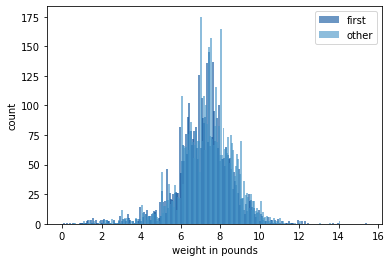

<Figure size 576x432 with 0 Axes>

In [22]:
# Dataframe split earlier.
firstwgt_hist = thinkstats2.Hist(first.totalwgt_lb, label= 'first')
otherwgt_hist = thinkstats2.Hist(other.totalwgt_lb, label= 'other')
width2 = 0.1
thinkplot.PrePlot(2)
thinkplot.Hist(firstwgt_hist, align= 'right', width= width2)
thinkplot.Hist(otherwgt_hist, align= 'left', width= width2)
thinkplot.Show(xlabel= 'weight in pounds', ylabel= 'count')

Mean weight of first babies.

In [17]:
firsts_avg = first.totalwgt_lb.mean()
firsts_avg

7.201094430437772

Mean weight of all other babies.

In [18]:
others_avg = other.totalwgt_lb.mean()
others_avg

7.325855614973262

Effect size and Cohens d

In [19]:
effects = firsts_avg - others_avg
print('First babies are on average', effects, 'lb less than other babies. This translates to', effects * 16, 'oz.')



First babies are on average -0.12476118453549034 lb less than other babies. This translates to -1.9961789525678455 oz.


In [20]:
differ = firsts_avg - others_avg
var_1 = first.totalwgt_lb.var()
var_2 = other.totalwgt_lb.var()
n_1, n_2 = len(first.totalwgt_lb), len(other.totalwgt_lb)
pooledVar = (n_1 * var_1 + n_2 * var_2) / (n_1 + n_2)
cohensd = diff/math.sqrt(pooledVar)
print('Cohens d is ', cohensd)
print('Compare this number to the number for prglngth',cohend)

Cohens d is  0.055464308804653806
Compare this number to the number for prglngth 0.028879044654449883
